In [114]:
import numpy as np
import seaborn as sns
import pandas as pd
import numpy.random_intel as rng
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
import plotly.offline as plt

In [3]:
f32_u = 2 ** (-23)
f16_u = 2 ** (-10)
bf16_u = 2 ** (-7)

In [102]:
f32_sigma = pd.read_csv('f32_sigma.csv')
f16_sigma = pd.read_csv('f16_sigma.csv')
bf16_sigma = pd.read_csv('bf16_sigma.csv')

f32_delta = pd.read_csv('f32_delta.csv')
f16_delta = pd.read_csv('f16_delta.csv')
bf16_delta = pd.read_csv('bf16_delta.csv')

In [60]:
def graph_layout(title):
    return {
        'title': title,
        'xaxis': {
            'title': 'Number of features'
        },
        'yaxis': {
            'title': 'Rounding error',
        },
        'legend': {
            'x': 0.05,
            'y': 0.95
        },
        'margin': { 'l': 80, 't': 35, 'r': 10, 'b': 35 },
        'width': 850,
        'height': 350
    }

In [119]:
def plot_distribution():
    data = StandardScaler().fit_transform(f32_delta)
    plt.iplot({
        'data': [
            { 'x': data[:, 0], 'y': data[:, 1], 'mode': 'markers', 
              'marker': { 'size': 2 }, 'type': 'scattergl' }
        ]
    })

plot_distribution()

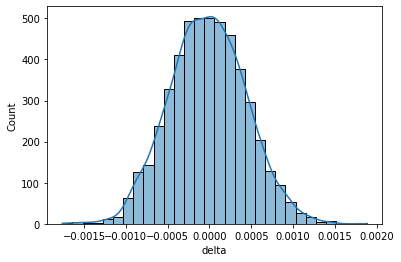

In [107]:
def plot_f32():
    n = np.arange(2, 10000, 100)
    plt.iplot({
        'data': [
            { 'x': f32_sigma['features'], 'y': f32_sigma['sigma'][1:], 
              'name': 'Rounding errors standard deviation' },
            { 'x': f32_sigma['features'], 'y': f32_sigma['mean'][1:],
              'name': 'Rounding errors mean' },
            { 'x': n, 'y': n * f32_u,
              'name': 'Standard deviation linear approximation' },
        ],
        'layout': graph_layout('float32 rounding errors means and standard deviation')
    })
    sns.histplot(f32_delta['delta'], bins=30, kde=True)

plot_f32()

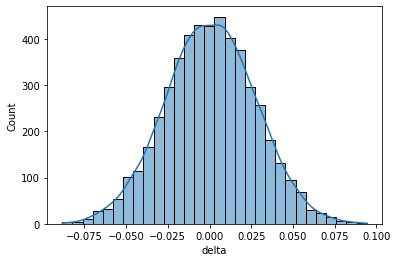

In [108]:
def plot_f16():
    max_n = 100
    n = np.arange(2, max_n)
    plt.iplot({
        'data': [
            { 'x': f16_sigma['features'], 'y': f16_sigma['sigma'][:max_n],
              'name': 'Rounding errors standard deviation' },
            { 'x': f16_sigma['features'], 'y': f16_sigma['mean'][:max_n],
              'name': 'Rounding errors mean' },
            { 'x': n, 'y': f16_u * n,
              'name': 'Standard deviation linear approximation' },
        ],
        'layout': graph_layout('float16 rounding errors means and standard deviation')
    })
    sns.histplot(f16_delta['delta'], bins=30, kde=True)

plot_f16()

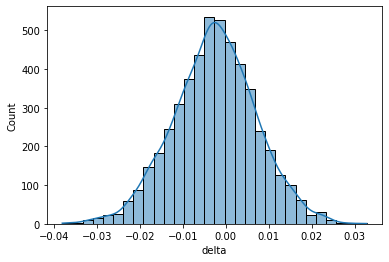

In [109]:
def plot_bf16():
    max_n = 100
    n = np.arange(2, max_n)
    plt.iplot({
        'data': [
            { 'x': bf16_sigma['features'], 'y': bf16_sigma['sigma'][:max_n],
              'name': 'Rounding errors standard deviation' },
            { 'x': bf16_sigma['features'], 'y': bf16_sigma['mean'][:max_n],
              'name': 'Rounding errors mean' },
            { 'x': n, 'y': n * bf16_u,
              'name': 'Standard deviation linear approximation' }        
        ],
        'layout': graph_layout('bfloat16 rounding errors means and standard deviation')
    })
    sns.histplot(bf16_delta['delta'], bins=30, kde=True)

plot_bf16()